In [1]:
# Import the required modules
import numpy as np

import sympy as sp
sp.init_printing(use_latex=True)

from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# Differential Equations Introduction

I have not taken a Differential Equations Class, but I have read about them in a few books, seen them in my work, and had my engineering friends say how cool they are. I've taken the liberty over the past few days to do some reading about what they are and the general ways of solving them. 

I watched one video that defined them as "any equation that has at least one derivative". There are two primary kinds of differential equations that I have heard of: 
 * Partial Differential Equations
 * Ordinary Differential Equations
 
I will only be covering Ordinary because Partials get very complicated very quickly. For most of my work, I will be using three sources: 
 * Python Programming and Numerical Methods
 * coms-reu/bootcamp/python/Part 3-B.ipynb \[mtsu notebook->https://github.com/coms-reu/boot-camp/blob/main/python/Part%203-B.ipynb\] 
 * Ordinary Differential Equations by Tennenbaum and Pollard
 
For the first major bit of this notebook, I won't be coding anything besides LaTeX and markdown. My intention is to have a basic understanding of DEs before I just start running code.


Let's get into it.

Consider this differential equation:

\begin{equation}
\frac{dy}{dx} +y=x
\end{equation}

We can say a few things about it. First, we can say that Y is a *dependent variable* because it is being differentiated with resepect to x. X is an independent variable because it can stand alone as it's not being differentiated relative to something.

I can also say that it is a first order diffential equation because the highest derivative appearing in the equation is just a first one.

Here is another example:

\begin{equation}
\frac{dx}{dt} +x=2cos(t)
\end{equation}

I can summarize it by saying it is a first order differential equation of the dependent variable x and independent variable t

# Solution of  a Differential Equation

Some differential equationsc an be either very difficult or impossible to solve. There is a *small* class of DEs that can be, however. When I say solve, I mean an exact solution. More often, you find approximations of solutions.

Typically, this is called solving differential equations Numerically. There are two methods that come to my mind
*  Euler's Method
*  Runger-Kutta Method

Unlike in something like a quadratic equation where you find specific roots...when you solve a differential equation you are really finding a function that satisifies the equation. Your answer to a DE may not be a specific coordinate or something like that. It will be a bit higher level than that.


Let's revisit a function for viewing this idea:

Ex. Verify that x = x(t) = cos(t)+sin(t) is a solution of

\begin{equation}
\frac{dx}{dt} +x=2cos(t)
\end{equation}

The way you would start this is taking the derivative of x(t)=cos(t)+sin(t). 

\begin{equation}
\frac{dx}{dt}= -sin(t) + cos(t)
\end{equation}

You can take this and replace the derivative notation and x respectively to get:

\begin{equation}
\frac{dx}{dt} +x = -sin(t) + cos(t) + cos(t)+sin(t) \\
= -sin(t) + cos(t) + cos(t)+sin(t)\\
= cos(t) + cos(t)\\
= 2cos(t)
\end{equation}

As you can see, that result equals our original equation. It's essential that I understand how this all works.

We could also check if cos(t) + sin(t) + e^-t is a solution.

Let's use the same process as earlier, starting with a derivative:

\begin{equation}
\frac{dx}{dt}= -sin(t) + cos(t) + -e^{-t}
\end{equation}

Plugging it back in:

\begin{equation}
\frac{dx}{dt} +x =  -sin(t) + cos(t) + -e^{-t} + sin(t) + cos(t) + e^{-t} \\
= -sin(t) +sin(t) + cos(t) + cos(t) -e^{-t}+ e^{-t}\\
= cos(t) + cos(t)\\
= 2cos(t)
\end{equation}

As you can probably deduce, no matter what I put in front of that e will result in a 2cost(t). For this reason we can define
\begin{equation}
x=cos(t)+sin(t)-Ce^{-t}
\end{equation}
as the *general solution*. General solutions let you find particular solutions

Ex. Find a solution such that x(0)=-1
\begin{equation}
x(0)= cos(0)+sin(0)+Ce^0 = -1 \\
1+C=-1, C=-2
\end{equation}

I wrote this simple code below to show how changing the C affects particular solutions. It's quite interesting to see how they all seem to "synchronize"

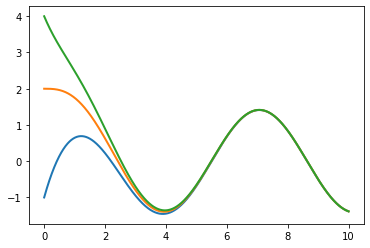

In [18]:
pointsGENd=1000
xaxis=np.linspace(0,10, pointsGENd)

c1=np.zeros(pointsGENd)
c2=np.zeros(pointsGENd)
c3=np.zeros(pointsGENd)
for i,each in enumerate(xaxis):
    c1[i] = np.cos(each)+np.sin(each) + -2* (2.718281828459045**(-each) )
    c2[i] = np.cos(each)+np.sin(each) + 1*( 2.718281828459045**(-each) )
    c3[i] = np.cos(each)+np.sin(each) + 3* (2.718281828459045**(-each) )

fig, ax = plt.subplots()
ax.plot(xaxis, c1, linewidth=2.0)
ax.plot(xaxis, c2, linewidth=2.0)
ax.plot(xaxis, c3, linewidth=2.0)
plt.show()

Solutions of a DE may not necessarily be unique. When 'Solving' a DE, it means to find all the solutions i.e. the general solution.



